# <h1><center><font color='#7bbbc9'>Analisis Caracteritzacio i Estabilitats</font> </center></h1>


### Objectiu de l'Estudi

L'objectiu d'aquest estudi és analitzar la relació entre la composició de la matèria primera (oleoresines) i l'estabilitat de les xantofil·les en el producte final. S'ha observat que l'estabilitat del producte final varia considerablement en funció de la oleoresina utilitzada, però no se sap per què. Actualment, només es coneix el contingut de xantofil·les de la oleoresina en el moment de la seva arribada, però la resta de la composició és desconeguda.

### Disseny Experimental

Per abordar aquest objectiu, s'ha realitzat un disseny experimental amb les següents característiques:

1. **Mostres**:
   - 50 oleoresines diferents, cadascuna amb dues reaccions pilot per minimitzar la variabilitat.
   - Cada reacció pilot inclou un previ i un final, característics del procés industrial.

2. **Condicions de la Reacció Pilot**:
   - El previ conté només sílice.
   - El final conté sílice i carbonat.

3. **Condicions de l'Assaig d'Estabilitat**:
   - Les mostres es guarden en una càmera climàtica a 40 graus Celsius i 75% d'humitat durant 42 dies (7 setmanes).
   - Es realitza una anàlisi de les xantofil·les totals cada setmana per determinar el percentatge de retenció de xantofil·les.

4. **Dades Addicionals Recollides**:
   - Mesures de clorofil·les, polifenols, compostos volàtils (tres grups: productes de degradació oxidativa d'àcids grassos i carotenoides, i productes de degradació termooxidativa dels carotenoides), acidesa (àcids grassos lliures), composició d'àcids grassos (saturats, monosaturats i poliinsaturats), tocoferols (quatre tipus), ferro i coure.
   - Paràmetres de la reacció: pèrdua de xantofil·les durant l'escalfament, rendiment de la reacció, temperatura màxima del reactor, temps de canvi de color en la saponificació, control de qualitat (color, densitat, pH, granulometria i humitat).

### Dades Disponibles

Les dades disponibles es divideixen en tres taules principals:

1. **Oleoresines**:
   - Informació general com el lot, mida, productor, origen, temps d'ensilatge, mètode d'extracció, dates de producció i caducitat, dades d'enviament i arribada, contaminació per dioxines i PCB, contingut de benzè, xantofil·les totals, i percentatges de luteïna, zeaxantina i epòxids.

2. **Matriu de Composició**:
   - Informació detallada sobre la composició de les oleoresines incloent clorofil·les, ferro, coure, acidesa, tocoferols, compostos volàtils, àcids grassos, i altres components.

3. **Estabilitat de Xantofil·les**:
   - Dades sobre la retenció de xantofil·les al llarg del temps en les condicions de l'assaig d'estabilitat, juntament amb la composició detallada de les oleoresines.

### Anàlisi Prevista

L'anàlisi es centrarà en trobar correlacions entre la composició de les oleoresines i la retenció de xantofil·les al llarg del temps. Això inclourà:

1. **Anàlisi Descriptiva**:
   - Resumir estadísticament les dades per cada variable.
   - Identificar possibles outliers i patrons generals.

2. **Anàlisi de Correlació**:
   - Utilitzar anàlisis de correlació per identificar relacions entre les variables de composició i la retenció de xantofil·les.
   - Determinar quins components tenen una influència significativa en l'estabilitat de les xantofil·les.

3. **Modelització**:
   - Desenvolupar models estadístics o d'aprenentatge automàtic per predir la retenció de xantofil·les basada en la composició de les oleoresines.
   - Validar els models utilitzant tècniques com la validació creuada.

4. **Interpretació dels Resultats**:
   - Interpretar els resultats per comprendre quins factors són crítics per l'estabilitat de les xantofil·les.
   - Proposar recomanacions per a la selecció i tractament de les oleoresines per millorar l'estabilitat del producte final.

Aquest enfocament permetrà una millor comprensió dels factors que influeixen en l'estabilitat de les xantofil·les i ajudarà a optimitzar el procés industrial per obtenir productes finals més estables.


* [1. Import Data](#primer)
* [2. Data Preprocessing](#segon)
* [5. Additional data Predictions](#cinq)
* [Summary](#final)

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.utils import to_categorical

# Carregar les dades
caract = pd.read_excel('caracteritzacio_dades.xlsx')
estab = pd.read_excel('estabilitat_dades.xlsx')
est = pd.read_excel('estadistiques_dades.xlsx')
matriu = pd.read_excel('matriu_dades.xlsx')
oleo = pd.read_excel('olea_dades.xlsx')


import warnings
warnings.filterwarnings('ignore')


In [3]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
oleo.head(5)

,NR,Lot,Mida lot,Productor,Origen,Temps d'ensilatge (dies),Extracció,Data producció,Data caducitat,Data enviament,Data arribada (estimada),Doc enviament,Bidons reservats,Nº BIDÓ 1,Nº BIDÓ 2,Nº BIDÓ 3,Nº BIDÓ 4,Dioxines (ng/kg),dl-PCB (ng/kg),ndl-PCB (µg/kg),Benzè (mg/kg),Xantofil·les prod,Lot ASM,Xantofil·les ASM,% Luteina,% Zeaxantina,% Epòxids
0,16,HKY:2022-08-01,4000,BH,HKY,13-20,Butà,NaT,2024-07-01,2022-08-11,2022-09-16,BH1,2,757019,757020,NaN,NaN,0.29,0.25,1.7,0.803,182.80,7570-1,184.62,85.05,4.45,4.61
1,17,HKY:2022-08-03,6000,BH,HKY,13-20,Butà,NaT,2024-07-01,2022-08-27,2022-10-06,BH2,2,758153,718154,NaN,NaN,0.31,0.14,1.7,0.306,189.37,7581-2,191.63,86.98,4.66,4.30
2,18,HKY:2022-08-04,8000,BH,HKY,13-20,Butà,NaT,2024-07-01,2022-08-27,2022-10-04,BH2,2,757934,757936,NaN,NaN,0.35,0.14,1.7,0.071,184.06,7579-1,186.78,86.18,4.99,4.41
3,19,HKY:2022-08-05,8000,BH,HKY,13-20,Butà,NaT,2024-07-01,2022-08-27,2022-10-04,BH2,4,757945,757946,757947.0,757948.0,0.23,0.14,1.7,0.104,186.39,7579-2,186.73,NaN,NaN,NaN
4,1,HLY:2022-08-02,8000,BH,HLY,13-20,Butà,NaT,2024-07-01,2022-09-05,2022-10-20,BH3,2,758838,758840,NaN,NaN,0.35,0.14,1.7,0.030,182.91,7588-1,182.75,86.64,4.72,4.97


In [5]:
matriu.head(5)

,NR,Lot ASM,Lot,Productor,Origen,Extracció,XT oleo proveidor,XT oleo reacció,Pèrdua escalfament oleo,Clorofil·les,Ferro,Coure,Acidesa (%oleic),alfa,beta,gamma,delta,TOTAL,"2,4-HEPTADIENAL",2-METHYLFURAN,2-PENTYLFURAN,HEXANAL,2-HEPTANONE,6M5H2ONE,"6M3,5H2ONE",TDN,ETHANONE,"2,6-DIMETHYLNAPHTALENE","2,6-DIMETHYLNAPHTALENE.1",TOLUENE,M-XYLENE,total productes ox AGPI,total oxidació carotenoides,total termoox carotenoides,C 8:0,C 10:0,C 12:0,C 14:0,C 15:0,C 15:1,C 16:0,C 16:1n7,C 17:0,C 18:0,C 18:1n9,C 18:1n7,C 18:2n6,C 20:0,C 18:3n3,C 21:0,C 20:2n6,C 22:0,C 20:3n3,C 20:4n6,C 23:0,C 24:0,C 24:1,MUFA,PUFA,SFA,Polifenols,Previ 7,Final 7,Previ 42,Final 42,XT caract,TOTAL HPLC,lut HPLC
0,1,7588-1,HLY:2022-08-02,BH,HLY,B,182.91,163.0700,10.846865,27.63,22.853353,0.806629,12.190216,37.580253,4.365834,3.699440,0.779702,46.425230,509790.795900,865816.023345,6.379447e+05,99628.463647,2.186577e+06,8.717347e+05,1.035221e+06,2.892785e+05,9.155755e+05,0.000000,25154.239205,7.323489e+06,2.166336e+06,4.299757e+06,1.906955e+06,1.071983e+07,0.339821,0.110783,1.545808,14.166844,0.120514,0.085361,39.690350,0.112649,0.199578,11.759569,2.116138,0.262960,16.732612,0.618489,10.000000,0.047600,0.075265,0.551650,0.044059,0.189009,0.127840,0.847991,0.255111,2.832219,27.040945,70.126837,0.416052,60.963117,59.906949,34.377468,31.332834,163.254019,213.124977,166.064427
1,2,7588-2,HKY:2022-08-06,BH,HKY,B,187.69,171.6975,8.520699,31.84,24.584645,0.541944,12.350365,40.435704,4.358994,4.370548,0.942043,50.107289,376942.096716,640626.759242,9.576305e+05,85760.362554,2.506697e+06,1.051596e+06,1.310622e+06,2.470040e+05,1.048338e+06,0.000000,34517.082726,6.241153e+06,2.422734e+06,4.567657e+06,2.362218e+06,9.993746e+06,0.341298,0.109685,1.474948,13.824014,0.113259,0.093744,39.563555,0.122526,0.191816,11.381101,2.166756,0.247622,17.242404,0.628712,10.341529,0.047524,0.077961,0.591901,0.055592,0.168943,0.133361,0.836416,0.245333,2.875981,27.886429,69.237590,0.504396,66.029933,70.732921,42.893472,38.900257,165.357963,216.822140,165.867713
2,3,7590-1,QZY:2022-08-01,BH,QZY,B,172.70,157.4175,8.849160,25.07,32.063715,0.754203,14.301608,38.300155,4.447665,3.727247,0.898992,47.374059,332926.744506,210482.541951,3.051317e+05,21211.441162,4.624654e+05,3.744233e+05,9.527728e+05,1.942869e+05,9.160095e+05,10934.140991,20873.355485,1.313525e+06,3.173760e+05,1.332218e+06,1.327196e+06,2.773005e+06,0.205679,0.131889,1.525570,13.514714,0.122533,0.169655,38.674859,0.120146,0.199176,11.701919,2.698958,0.257665,18.222981,0.652075,9.538248,0.049403,0.090071,0.556308,0.046696,0.216960,0.156590,0.874597,0.273307,3.519732,28.114956,68.365312,0.357291,70.404597,69.883071,42.407992,39.867934,154.708468,198.353410,149.882611
3,4,7585-1,1-0220-220810D,CG,X,H,175.96,171.0900,2.767674,66.08,36.457039,1.326537,11.589389,31.160609,3.200461,5.099809,1.277284,40.738163,182073.064106,809456.815638,1.305897e+06,0.000000,4.911055e+05,3.895685e+05,6.747748e+05,1.674569e+06,1.342027e+06,181786.716234,170624.016555,1.252313e+07,7.990656e+06,2.788532e+06,1.064343e+06,2.388279e+07,0.372578,0.119122,1.514993,13.844831,0.111198,0.099229,39.790394,0.156735,0.171578,12.195766,2.530933,0.256758,16.289102,0.622621,9.806116,0.038561,0.085301,0.626978,0.049826,0.126477,0.125233,0.868619,0.197050,3.240705,26.356822,70.402473,2.109902,66.102139,69.911129,37.220113,35.979499,166.456117,216.342564,168.891777
4,5,7585-2,1-0220-220811,CG,X,H,174.04,166.6300,5.073546,67.58,38.461878,1.491634,9.673552,32.470036,3.375741,5.181267,1.316902,42.343947,220689.802249,882198.433714,1.177976e+06,0.000000,4.696484e+05,4.202716e+05,8.354928e+05,2.396781e+06,1.669696e+06,322058.097793,290938.956691,1.202648e+07,7.420039e+06,2.750513e+06,1.255764e+06,2.412599e+07,0.205055,0.117221,1.514427,13.835769,0.107831,0.236331,39.775454,0.155225,0.167273,12.126128,2.723809,0.259074,16.334217,0.619346,9.819675,0.043947,0.082712,0.584691,0.044257,0.141038,0.129281,0.784590,0.192650,3.567088,26.421899,70.011013,2.163701,67.109878,68.922966,34.812692,35.

In [6]:
est.head(5)

,NR,Lot ASM,Lot,Productor,XT oleo proveidor,XT oleo reacció,Pèrdua escalfament oleo,Clorofil·les,Ferro,Coure,Acidesa (%oleic),alfa_Tocoferols (mg/g),beta_Tocoferols (mg/g),gamma_Tocoferols (mg/g),delta_Tocoferols (mg/g),TOTAL_Tocoferols (mg/g),"2,4-HEPTADIENAL_volàtils (àrea/pes)",2-METHYLFURAN_volàtils (àrea/pes),2-PENTYLFURAN_volàtils (àrea/pes),HEXANAL_volàtils (àrea/pes),2-HEPTANONE_volàtils (àrea/pes),6M5H2ONE_volàtils (àrea/pes),"6M3,5H2ONE_volàtils (àrea/pes)",TDN_volàtils (àrea/pes),ETHANONE_volàtils (àrea/pes),"2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes)","2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes).1",TOLUENE_volàtils (àrea/pes),M-XYLENE_volàtils (àrea/pes),total productes ox AGPI_volàtils (àrea/pes),total oxidació carotenoides_volàtils (àrea/pes),total termoox carotenoides_volàtils (àrea/pes),C 8:0 Àcids grassos (%),C 10:0 Àcids grassos (%),C 12:0 Àcids grassos (%),C 14:0 Àcids grassos (%),C 15:0 Àcids grassos (%),C 15:1 Àcids grassos (%),C 16:0 Àcids grassos (%),C 16:1n7 Àcids grassos (%),C 17:0 Àcids grassos (%),C 18:0 Àcids grassos (%),C 18:1n9 Àcids grassos (%),C 18:1n7 Àcids grassos (%),C 18:2n6 Àcids grassos (%),C 20:0 Àcids grassos (%),C 18:3n3 Àcids grassos (%),C 21:0 Àcids grassos (%),C 20:2n6 Àcids grassos (%),C 22:0 Àcids grassos (%),C 20:3n3 Àcids grassos (%),C 20:4n6 Àcids grassos (%),C 23:0 Àcids grassos (%),C 24:0 Àcids grassos (%),C 24:1 Àcids grassos (%),MUFA Àcids grassos (%),PUFA Àcids grassos (%),SFA Àcids grassos (%),Polifenols,Previ 7,Final 7,Previ 42,Final 42,XT caract,TOTAL HPLC,lut HPLC
0,1,7588-1,HLY:2022-08-02,BH,182.91,163.0700,10.846865,27.63,22.853353,0.806629,12.190216,37.580253,4.365834,3.699440,0.779702,46.425230,509790.795900,865816.023345,6.379447e+05,99628.463647,2.186577e+06,8.717347e+05,1.035221e+06,2.892785e+05,9.155755e+05,0.000000,25154.239205,7.323489e+06,2.166336e+06,4.299757e+06,1.906955e+06,1.071983e+07,0.339821,0.110783,1.545808,14.166844,0.120514,0.085361,39.690350,0.112649,0.199578,11.759569,2.116138,0.262960,16.732612,0.618489,10.000000,0.047600,0.075265,0.551650,0.044059,0.189009,0.127840,0.847991,0.255111,2.832219,27.040945,70.126837,0.416052,60.963117,59.906949,34.377468,31.332834,163.254019,213.124977,166.064427
1,2,7588-2,HKY:2022-08-06,BH,187.69,171.6975,8.520699,31.84,24.584645,0.541944,12.350365,40.435704,4.358994,4.370548,0.942043,50.107289,376942.096716,640626.759242,9.576305e+05,85760.362554,2.506697e+06,1.051596e+06,1.310622e+06,2.470040e+05,1.048338e+06,0.000000,34517.082726,6.241153e+06,2.422734e+06,4.567657e+06,2.362218e+06,9.993746e+06,0.341298,0.109685,1.474948,13.824014,0.113259,0.093744,39.563555,0.122526,0.191816,11.381101,2.166756,0.247622,17.242404,0.628712,10.341529,0.047524,0.077961,0.591901,0.055592,0.168943,0.133361,0.836416,0.245333,2.875981,27.886429,69.237590,0.504396,66.029933,70.732921,42.893472,38.900257,165.357963,216.822140,165.867713
2,3,7590-1,QZY:2022-08-01,BH,172.70,157.4175,8.849160,25.07,32.063715,0.754203,14.301608,38.300155,4.447665,3.727247,0.898992,47.374059,332926.744506,210482.541951,3.051317e+05,21211.441162,4.624654e+05,3.744233e+05,9.527728e+05,1.942869e+05,9.160095e+05,10934.140991,20873.355485,1.313525e+06,3.173760e+05,1.332218e+06,1.327196e+06,2.773005e+06,0.205679,0.131889,1.525570,13.514714,0.122533,0.169655,38.674859,0.120146,0.199176,11.701919,2.698958,0.257665,18.222981,0.652075,9.538248,0.049403,0.090071,0.556308,0.046696,0.216960,0.156590,0.874597,0.273307,3.519732,28.114956,68.365312,0.357291,70.404597,69.883071,42.407992,39.867934,154.708468,198.353410,149.882611
3,4,7585-1,1-0220-220810D,CG,175.96,171.0900,2.767674,66.08,36.457039,1.326537,11.589389,31.160609,3.200461,5.099809,1.277284,40.738163,182073.064106,809456.815638,1.305897e+06,0.000000,4.911055e+05,3.895685e+05,6.747748e+05,1.674569e+06,1.342027e+06,181786.716234,170624.016555,1.252313e+07,7.990656e+06,2.788532e+06,1.064343e+06,2.388279e+07,0.372578,0.119122,1.514993,13.844831,0.111198,0.099229,39.790394,0.156735,0.171578,12.195766,2.530933,0.256758,

In [7]:
estab.columns

Index(['NR', 'Lot ASM', 'Lot', 'Productor', 'Previ 7', 'Final 7', 'Previ 42',
       'Final 42'],
      dtype='object')

In [8]:
estab.head(5)

,NR,Lot ASM,Lot,Productor,Previ 7,Final 7,Previ 42,Final 42
0,1,7588-1,HLY:2022-08-02,BH,60.963117,59.906949,34.377468,31.332834
1,2,7588-2,HKY:2022-08-06,BH,66.029933,70.732921,42.893472,38.900257
2,3,7590-1,QZY:2022-08-01,BH,70.404597,69.883071,42.407992,39.867934
3,4,7585-1,1-0220-220810D,CG,66.102139,69.911129,37.220113,35.979499
4,5,7585-2,1-0220-220811,CG,67.109878,68.922966,34.812692,35.529230


In [9]:
caract.head(5)

,codi previ,data,N oleo,lot oleo ASM,lot oleo proveïdor,proveïdor,sac,xantofiles oleo formulació,canvi color,temps total reacció,Tª inici reacció,Tª màxima,kg previ teòrics,kg previ,% pèrdua kg previ segons teòric,kg aigua neteja,kg carbonat rebuig,kg oleo,Rendiment,Rendiment (XT proveidor),Promig % pèrdua escalfament,kg teòrics final,kg final,% pèrdua final,xantofiles final,xantofilia objectiu,xandofilia desviació
0,34825,2023-02-14,1,7588-1,HLY:2022-08-02,BH,1,182.91,55,85,68.7,87.9,35.49,32.83,7.495069,5.42,5.93,9.96,99.760099,88.530202,12.508884,40,38.20,4.500,21.42,20.3,5.228758
1,34832,2023-02-15,1,7588-1,HLY:2022-08-02,BH,2,182.91,55,85,67.9,88.9,36.3,34.27,5.592287,5.10,4.90,10.29,104.966150,90.521899,NaN,40,38.68,3.300,20.69,20.3,1.884969
2,34867,2023-02-20,2,7588-2,HKY:2022-08-06,BH,1,187.69,50,80,70.1,91.8,36.67,34.57,5.726752,5.98,4.96,10.42,97.648975,89.808546,8.034525,40,37.91,5.225,20.38,20.3,0.392542
3,34880,2023-02-21,2,7588-2,HKY:2022-08-06,BH,2,187.69,50,80,72.8,90.6,35.86,33.69,6.051311,5.85,4.62,10.13,97.835640,89.969798,NaN,40,38.59,3.525,21.47,20.3,5.449464
4,34903,2023-02-24,3,7590-1,QZY:2022-08-01,BH,1,172.70,50,80,72.6,88.3,35.59,33.70,5.310480,5.44,5.14,10.04,102.207521,92.803482,8.665316,40,38.81,2.975,20.38,20.3,0.392542


DEscricio del objectiu : objecitu es coneixer millor materia primera i en concret es torbar relacio entre composicio de la materia primera i lestabilitat de les xantofiles al producte final. sha observat que l'estbailitat del productte final es bastant variable en funcio de la oleorasina que es fa servir i no se sap epr que. quan arirba la olea nomes sabem el contingut de xantofiles la resta no se sap. Sha fet un disney experimental on shan utilitzat 50 oleos, i shan fet reacicons pilot, amb cada oleo shan fet dues reaccions per tenir una mitja. Una reaccio pilot pot tenir certa variabilitat per aixo dos reaccions epr cada mostra. Addicionalment s'aprofita per fer un previ i un final, caracteristic del proces industria. En el previ es el caldo de saponificacio que es  bareja amb cilice que absorbeix l'aigua i amb una mica de carbonat. En aquest cas en les reacions pilot hem fet que el previ nomes portava cilice i el final era cilice i carbonat. Aixo es fa per veure si podem veure alguna diferencia significativa a nivell destabilitat a nivell de efecte del carbonat.



50 oleos, amb dos reaccion pilot epr cada una i previs i finals epr cada una  i estudi d'estavilitat en cabra climatica de 40 graus i 75% d'humitat. A la camera estara 42 dies 7 setmanes i cada setmana es fa una analisis de xantofiles totals. mab aixo podem veure quantes xantofiles queden al final exresat en percentatge de retencio de xantofiles. Al prinicpi es 100 i al llarg del periode va reduint. Aquesta es la nsotre dada y. El que tenim addicionalment  son un conjunt de columnes addicionals per cada registre intenetant determinant tot el possibe de la composicio. Sha mesurat: clorofiles, polifanols, compostos volatis(tres grups)) (dins la fraccio volatel mirem compostos que venen de la degradacio oxidativa tant d'acids grassos com dels carotanoides i tambe de la degradacio termoxidativa dels carotanoides ( en le proces de obtencio de oleo hi ha dos maneres de fer bota o hexa i quan sextreu amb hexa s'utilitzen temeperatures mes elevades durant ems estonat) de fet les extretes amb hexa tenen mes volatisl provinent de la termoxitacio dels carotanoides)), acidesa (assids grasso lliures ) composicio acids grassos (hi ha saturats monosaturats o polinsaturats)), tokofarols (hi ha 4 tipos)),  ferro i coure.

 objectiu de veure la relacio entre lestabilitat de xantofiles amb producte final amb la composicio de la oleo. 

  objectiu de veure la relacio entre lestabilitat de xantofiles amb producte final amb la composicio de la oleo. 


Tenim altres calculs com parametres de la reaccio com per exemple: perdua de xantofiles quan s'escalfa bido de la oleo,  no totes les oleos perden en mateix en les amteixes condicions controlades; rendiment reacio,  kilos de previ teorics i els que acaben sortitn, emperatura maxima a la que arriba le reactor, temps que tarda en fer el canvi de color en la saponificacio, tambe hi ha control de qualitat tipic: color, dencitat ph i granolometria i humitat ( per saber quines oles donen cada cosa) 



In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.utils import to_categorical 



In [11]:
est.head()

,NR,Lot ASM,Lot,Productor,XT oleo proveidor,XT oleo reacció,Pèrdua escalfament oleo,Clorofil·les,Ferro,Coure,Acidesa (%oleic),alfa_Tocoferols (mg/g),beta_Tocoferols (mg/g),gamma_Tocoferols (mg/g),delta_Tocoferols (mg/g),TOTAL_Tocoferols (mg/g),"2,4-HEPTADIENAL_volàtils (àrea/pes)",2-METHYLFURAN_volàtils (àrea/pes),2-PENTYLFURAN_volàtils (àrea/pes),HEXANAL_volàtils (àrea/pes),2-HEPTANONE_volàtils (àrea/pes),6M5H2ONE_volàtils (àrea/pes),"6M3,5H2ONE_volàtils (àrea/pes)",TDN_volàtils (àrea/pes),ETHANONE_volàtils (àrea/pes),"2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes)","2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes).1",TOLUENE_volàtils (àrea/pes),M-XYLENE_volàtils (àrea/pes),total productes ox AGPI_volàtils (àrea/pes),total oxidació carotenoides_volàtils (àrea/pes),total termoox carotenoides_volàtils (àrea/pes),C 8:0 Àcids grassos (%),C 10:0 Àcids grassos (%),C 12:0 Àcids grassos (%),C 14:0 Àcids grassos (%),C 15:0 Àcids grassos (%),C 15:1 Àcids grassos (%),C 16:0 Àcids grassos (%),C 16:1n7 Àcids grassos (%),C 17:0 Àcids grassos (%),C 18:0 Àcids grassos (%),C 18:1n9 Àcids grassos (%),C 18:1n7 Àcids grassos (%),C 18:2n6 Àcids grassos (%),C 20:0 Àcids grassos (%),C 18:3n3 Àcids grassos (%),C 21:0 Àcids grassos (%),C 20:2n6 Àcids grassos (%),C 22:0 Àcids grassos (%),C 20:3n3 Àcids grassos (%),C 20:4n6 Àcids grassos (%),C 23:0 Àcids grassos (%),C 24:0 Àcids grassos (%),C 24:1 Àcids grassos (%),MUFA Àcids grassos (%),PUFA Àcids grassos (%),SFA Àcids grassos (%),Polifenols,Previ 7,Final 7,Previ 42,Final 42,XT caract,TOTAL HPLC,lut HPLC
0,1,7588-1,HLY:2022-08-02,BH,182.91,163.0700,10.846865,27.63,22.853353,0.806629,12.190216,37.580253,4.365834,3.699440,0.779702,46.425230,509790.795900,865816.023345,6.379447e+05,99628.463647,2.186577e+06,8.717347e+05,1.035221e+06,2.892785e+05,9.155755e+05,0.000000,25154.239205,7.323489e+06,2.166336e+06,4.299757e+06,1.906955e+06,1.071983e+07,0.339821,0.110783,1.545808,14.166844,0.120514,0.085361,39.690350,0.112649,0.199578,11.759569,2.116138,0.262960,16.732612,0.618489,10.000000,0.047600,0.075265,0.551650,0.044059,0.189009,0.127840,0.847991,0.255111,2.832219,27.040945,70.126837,0.416052,60.963117,59.906949,34.377468,31.332834,163.254019,213.124977,166.064427
1,2,7588-2,HKY:2022-08-06,BH,187.69,171.6975,8.520699,31.84,24.584645,0.541944,12.350365,40.435704,4.358994,4.370548,0.942043,50.107289,376942.096716,640626.759242,9.576305e+05,85760.362554,2.506697e+06,1.051596e+06,1.310622e+06,2.470040e+05,1.048338e+06,0.000000,34517.082726,6.241153e+06,2.422734e+06,4.567657e+06,2.362218e+06,9.993746e+06,0.341298,0.109685,1.474948,13.824014,0.113259,0.093744,39.563555,0.122526,0.191816,11.381101,2.166756,0.247622,17.242404,0.628712,10.341529,0.047524,0.077961,0.591901,0.055592,0.168943,0.133361,0.836416,0.245333,2.875981,27.886429,69.237590,0.504396,66.029933,70.732921,42.893472,38.900257,165.357963,216.822140,165.867713
2,3,7590-1,QZY:2022-08-01,BH,172.70,157.4175,8.849160,25.07,32.063715,0.754203,14.301608,38.300155,4.447665,3.727247,0.898992,47.374059,332926.744506,210482.541951,3.051317e+05,21211.441162,4.624654e+05,3.744233e+05,9.527728e+05,1.942869e+05,9.160095e+05,10934.140991,20873.355485,1.313525e+06,3.173760e+05,1.332218e+06,1.327196e+06,2.773005e+06,0.205679,0.131889,1.525570,13.514714,0.122533,0.169655,38.674859,0.120146,0.199176,11.701919,2.698958,0.257665,18.222981,0.652075,9.538248,0.049403,0.090071,0.556308,0.046696,0.216960,0.156590,0.874597,0.273307,3.519732,28.114956,68.365312,0.357291,70.404597,69.883071,42.407992,39.867934,154.708468,198.353410,149.882611
3,4,7585-1,1-0220-220810D,CG,175.96,171.0900,2.767674,66.08,36.457039,1.326537,11.589389,31.160609,3.200461,5.099809,1.277284,40.738163,182073.064106,809456.815638,1.305897e+06,0.000000,4.911055e+05,3.895685e+05,6.747748e+05,1.674569e+06,1.342027e+06,181786.716234,170624.016555,1.252313e+07,7.990656e+06,2.788532e+06,1.064343e+06,2.388279e+07,0.372578,0.119122,1.514993,13.844831,0.111198,0.099229,39.790394,0.156735,0.171578,12.195766,2.530933,0.256758,

MSE (conjunt d'entrenament): 2.8663556256910803e-16
R2 (conjunt d'entrenament): 1.0
MSE (conjunt de prova): 113.45201850230066
R2 (conjunt de prova): -13.399484076483398


/var/folders/yn/8fryx72x5l5fctjp6l2grp780000gn/T/ipykernel_1135/3872643668.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red', label='Línia de regressió')


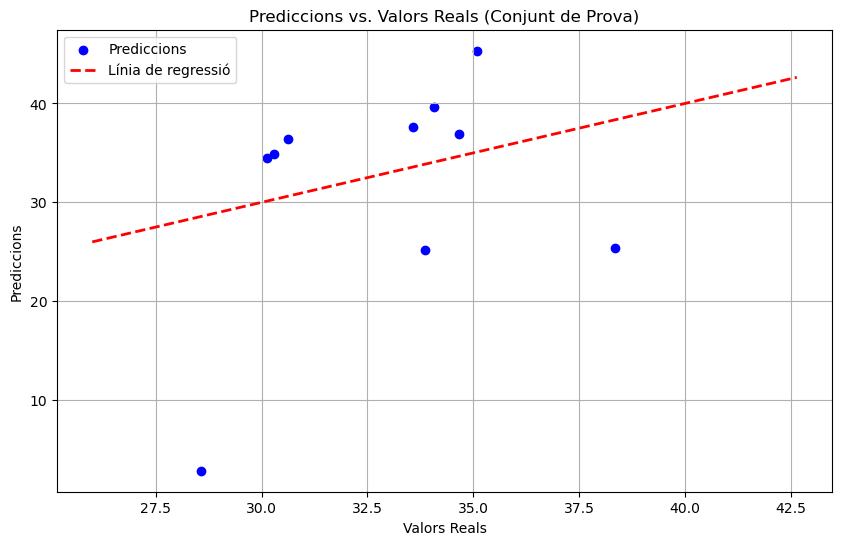

In [41]:
# Elimina les columnes especificades
columns_to_drop = ['Lot ASM', 'Lot', 'Productor', 'Xantofil·les']
est.drop(columns=columns_to_drop, inplace=True)

# Elimina files amb dades que faltin
est.dropna(inplace=True)

# Converteix les dades de les columnes que contenen cadenes a valors numèrics
est_numeric = est.apply(pd.to_numeric, errors='coerce')

# Separa les característiques (variables explicatives) i la variable objectiu
X = est_numeric.drop(columns=['Final 42'])  # Característiques (esborra la columna 'Final 42')
y = est_numeric['Final 42']  # Variable objectiu

# Divideix les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea i ajusta el model de regressió lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Prediu les respostes per les dades d'entrenament i de prova
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calcula les mètriques d'avaluació
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Imprimeix les mètriques
print("MSE (conjunt d'entrenament):", mse_train)
print("R2 (conjunt d'entrenament):", r2_train)
print("MSE (conjunt de prova):", mse_test)
print("R2 (conjunt de prova):", r2_test)

# Visualització gràfica
plt.figure(figsize=(10, 6))

# Representació gràfica de les prediccions versus els valors reals en el conjunt de prova
plt.scatter(y_test, y_pred_test, color='blue', label='Prediccions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red', label='Línia de regressió')
plt.title('Prediccions vs. Valors Reals (Conjunt de Prova)')
plt.xlabel('Valors Reals')
plt.ylabel('Prediccions')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
X

,NR,Lot ASM,Lot,Productor,XT oleo proveidor,XT oleo reacció,Pèrdua escalfament oleo,Previ 7,Final 7,Previ 42,Clorofil·les,Ferro,Coure,Acidesa (%oleic),alfa_Tocoferols (mg/g),beta_Tocoferols (mg/g),gamma_Tocoferols (mg/g),delta_Tocoferols (mg/g),TOTAL_Tocoferols (mg/g),"2,4-HEPTADIENAL_volàtils (àrea/pes)",2-METHYLFURAN_volàtils (àrea/pes),2-PENTYLFURAN_volàtils (àrea/pes),HEXANAL_volàtils (àrea/pes),2-HEPTANONE_volàtils (àrea/pes),6M5H2ONE_volàtils (àrea/pes),"6M3,5H2ONE_volàtils (àrea/pes)",TDN_volàtils (àrea/pes),ETHANONE_volàtils (àrea/pes),"2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes)","2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes).1",TOLUENE_volàtils (àrea/pes),M-XYLENE_volàtils (àrea/pes),total productes ox AGPI_volàtils (àrea/pes),total oxidació carotenoides_volàtils (àrea/pes),total termoox carotenoides_volàtils (àrea/pes),C 8:0 Àcids grassos (%),C 10:0 Àcids grassos (%),C 12:0 Àcids grassos (%),C 14:0 Àcids grassos (%),C 15:0 Àcids grassos (%),C 15:1 Àcids grassos (%),C 16:0 Àcids grassos (%),C 16:1n7 Àcids grassos (%),C 17:0 Àcids grassos (%),C 18:0 Àcids grassos (%),C 18:1n9 Àcids grassos (%),C 18:1n7 Àcids grassos (%),C 18:2n6 Àcids grassos (%),C 20:0 Àcids grassos (%),C 18:3n3 Àcids grassos (%),C 21:0 Àcids grassos (%),C 20:2n6 Àcids grassos (%),C 22:0 Àcids grassos (%),C 20:3n3 Àcids grassos (%),C 20:4n6 Àcids grassos (%),C 23:0 Àcids grassos (%),C 24:0 Àcids grassos (%),C 24:1 Àcids grassos (%),MUFA Àcids grassos (%),PUFA Àcids grassos (%),SFA Àcids grassos (%),Polifenols,Xantofil·les
0,1,7588-1,HLY:2022-08-02,BH,182.91,163.0700,10.846865,60.963117,59.906949,34.377468,27.63,22.853353,0.806629,12.190216,37.580253,4.365834,3.699440,0.779702,46.425230,509790.795900,8.658160e+05,6.379447e+05,99628.463647,2.186577e+06,8.717347e+05,1.035221e+06,2.892785e+05,9.155755e+05,0.000000,25154.239205,7.323489e+06,2.166336e+06,4.299757e+06,1.906955e+06,1.071983e+07,0.339821,0.110783,1.545808,14.166844,0.120514,0.085361,39.690350,0.112649,0.199578,11.759569,2.116138,0.262960,16.732612,0.618489,10.000000,0.047600,0.075265,0.551650,0.044059,0.189009,0.127840,0.847991,0.255111,2.832219,27.040945,70.126837,0.416052,NaN
1,2,7588-2,HKY:2022-08-06,BH,187.69,171.6975,8.520699,66.029933,70.732921,42.893472,31.84,24.584645,0.541944,12.350365,40.435704,4.358994,4.370548,0.942043,50.107289,376942.096716,6.406268e+05,9.576305e+05,85760.362554,2.506697e+06,1.051596e+06,1.310622e+06,2.470040e+05,1.048338e+06,0.000000,34517.082726,6.241153e+06,2.422734e+06,4.567657e+06,2.362218e+06,9.993746e+06,0.341298,0.109685,1.474948,13.824014,0.113259,0.093744,39.563555,0.122526,0.191816,11.381101,2.166756,0.247622,17.242404,0.628712,10.341529,0.047524,0.077961,0.591901,0.055592,0.168943,0.133361,0.836416,0.245333,2.875981,27.886429,69.237590,0.504396,NaN
2,3,7590-1,QZY:2022-08-01,BH,172.70,157.4175,8.849160,70.404597,69.883071,42.407992,25.07,32.063715,0.754203,14.301608,38.300155,4.447665,3.727247,0.898992,47.374059,332926.744506,2.104825e+05,3.051317e+05,21211.441162,4.624654e+05,3.744233e+05,9.527728e+05,1.942869e+05,9.160095e+05,10934.140991,20873.355485,1.313525e+06,3.173760e+05,1.332218e+06,1.327196e+06,2.773005e+06,0.205679,0.131889,1.525570,13.514714,0.122533,0.169655,38.674859,0.120146,0.199176,11.701919,2.698958,0.257665,18.222981,0.652075,9.538248,0.049403,0.090071,0.556308,0.046696,0.216960,0.156590,0.874597,0.273307,3.519732,28.114956,68.365312,0.357291,NaN
3,4,7585-1,1-0220-220810D,CG,175.96,171.0900,2.767674,66.102139,69.911129,37.220113,66.08,36.457039,1.326537,11.589389,31.160609,3.200461,5.099809,1.277284,40.738163,182073.064106,8.094568e+05,1.305897e+06,0.000000,4.911055e+05,3.895685e+05,6.747748e+05,1.674569e+06,1.342027e+06,181786.716234,170624.016555,1.252313e+07,7.990656e+06,2.788532e+06,1.064343e+06,2.388279e+07,0.372578,0.119122,1.514993,13.844831,0.111198,0.099229,39.790394,0.156735,0.171578,12.195766,2.530933,0.256758,16.289102,0.622621,9.806116,0.038561,0.085301,0.626978,0.049826,0.126477,0.125233,0.868619,0.197050,3.240705,26.35682

In [7]:
est_numeric = est.apply(pd.to_numeric, errors='coerce')
X = est_numeric.drop(columns=y_options)
y = est_numeric['Previ 7']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Cargar datos
caract = pd.read_excel('caracteritzacio_dades.xlsx')
estab = pd.read_excel('estabilitat_dades.xlsx')
est = pd.read_excel('estadistiques_dades.xlsx')
matriu = pd.read_excel('matriu_dades.xlsx')
oleo = pd.read_excel('olea_dades.xlsx')

# Seleccionar la variable y
selected_y = 'Final 42'

# Preprocesamiento de datos
est_numeric = est.apply(pd.to_numeric, errors='coerce')
y = est_numeric[selected_y]
X = est_numeric.drop(columns=['Previ 7', 'Final 7', 'Previ 42', 'Final 42','Lot ASM','Lot','Productor'])

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor with OneHotEncoder for categorical variables and SimpleImputer for numeric variables
preprocessor = ColumnTransformer(
transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Debugging: Imprimir información sobre X y y antes de dividir
print("Número de muestras en X después del preprocesamiento:", len(X))
print("Número de muestras en y después del preprocesamiento:", len(y))

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y sus parámetros
model_params = {
    'Linear Regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ]),
        'params': {
            'regressor__normalize': [True, False]  # Normalizar dentro del pipeline
        }
        },
    
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Entrenar y evaluar modelos
best_model = None
best_model_name = ""
best_score = -np.inf
best_models = {}
best_scores = {}

for model_name, mp in model_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp['model'])
    ])
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', verbose=1, n_jobs=-1)
    clf.fit(X_train, y_train)
    score = clf.best_score_
    if score > best_score:
        best_score = score
        best_model_name = model_name
        best_model = clf.best_estimator_
    
    print(f"Modelo: {model_name} - Mejor score R²: {score}")
    print(f"Mejores parámetros: {clf.best_params_}")
    print("-----------------------------------------")

# Guardar el mejor modelo
joblib.dump(best_model, 'mejor_modelo.pkl')
print(f"El mejor modelo '{best_model_name}' ha sido guardado correctamente como 'mejor_modelo.pkl'.")


Número de muestras en X después del preprocesamiento: 50
Número de muestras en y después del preprocesamiento: 50
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/Gemma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/Gemma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

Modelo: Linear Regression - Mejor score R²: -5.211547643195247
Mejores parámetros: {'regressor__normalize': True}
-----------------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/Gemma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/Gemma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

Modelo: Random Forest - Mejor score R²: -0.2879346477334959
Mejores parámetros: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
-----------------------------------------
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Modelo: Gradient Boosting - Mejor score R²: -0.30208683909984213
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
-----------------------------------------
El mejor modelo 'Random Forest' ha sido guardado correctamente como 'mejor_modelo.pkl'.


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [23]:
selected_y = 'Previ 7'  # Selecciona la variable Y que vols predir

# Preparació de les dades per al model
est_numeric = est.apply(pd.to_numeric, errors='coerce')
X = est_numeric.drop(columns=y_options)
y = est_numeric[selected_y]

# Guardar les etiquetes de les columnes per a l'anàlisi de la importància
feature_names = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.columns)
    ])

# Divisió de les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Millors paràmetres del model Random Forest (predefinits per simplicitat)
best_params_rf = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Inicialitzar el model Random Forest amb els millors paràmetres
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Entrenar el model
rf_model.fit(X_train, y_train)

# Importància de les característiques
importances = rf_model.feature_importances_

# Obtenir els noms de les característiques després del preprocés
feature_names_transformed = X.columns.tolist()

# Assegurar-se que les llargades coincideixin
if len(importances) == len(feature_names_transformed):
    feature_importance = pd.Series(importances, index=feature_names_transformed).sort_values(ascending=False)
else:
    print(len(importances))
    print(len(feature_names_transformed))

# Variables significatives basades en la importància
significant_variables = feature_importance.head(60).index.tolist()

# Crear caixes d'entrada per a les variables significatives en un format de quadrícula
st.header("Valors obtinguts de la oleo per a la predicció:")
input_values = {}
num_columns = 5
num_rows = (len(significant_variables) + num_columns - 1) // num_columns  # Calcular el nombre de files necessàries

for row in range(num_rows):
    cols = st.columns(num_columns)
    for i, col in enumerate(cols):
        index = row * num_columns + i
        if index < len(significant_variables):
            feature = significant_variables[index]
            input_values[feature] = col.number_input(feature)

# Preparar les dades d'entrada com a DataFrame per a la predicció
input_data = pd.DataFrame([input_values])

# Aplicar el preprocessor a les dades d'entrada
input_data_preprocessed = preprocessor.transform(input_data)

# Realitzar la predicció
prediction = rf_model.predict(input_data_preprocessed)

# Mostrar el resultat de la predicció
st.subheader(f"Predicció per '{selected_y}':")
st.write(prediction[0])


63
65


NameError: name 'feature_importance' is not defined

In [22]:

est_numeric = est.apply(pd.to_numeric, errors='coerce')
X = est_numeric.drop(columns=y_options)
y = est_numeric['Final 7']

feature_names = X.columns.tolist()
importances = rf_model.feature_importances_


# Divisió de les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Millors paràmetres del model Random Forest (predefinits per simplicitat)
best_params_rf = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Inicialitzar el model Random Forest amb els millors paràmetres
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Entrenar el model
rf_model.fit(X_train, y_train)

# Importància de les característiques
importances = rf_model.feature_importances_

# Obtenir els noms de les característiques després del preprocés
feature_names_transformed = X.columns.tolist()

# Assegurar-se que les llargades coincideixin
if len(importances) == len(feature_names_transformed):
    feature_importance = pd.Series(importances, index=feature_names_transformed).sort_values(ascending=False)
else:
    print("Les llargades no coincideixen!")
    print(f"Importàncies: {len(importances)}")
    print(f"Característiques: {len(feature_names_transformed)}")

# Variables significatives basades en la importància
significant_variables = feature_importance.head(60).index.tolist()

# Crear caixes d'entrada per a les variables significatives en un format de quadrícula
st.header("Valors obtinguts de la oleo per a la predicció:")
input_values = {}
num_columns = 5
num_rows = (len(significant_variables) + num_columns - 1) // num_columns  # Calcular el nombre de files necessàries

for row in range(num_rows):
    cols = st.columns(num_columns)
    for i, col in enumerate(cols):
        index = row * num_columns + i
        if index < len(significant_variables):
            feature = significant_variables[index]
            input_values[feature] = col.number_input(feature)

# Preparar les dades d'entrada com a DataFrame per a la predicció
input_data = pd.DataFrame([input_values])

# Aplicar el preprocessor a les dades d'entrada
input_data_preprocessed = preprocessor.transform(input_data)

# Realitzar la predicció
prediction = rf_model.predict(input_data_preprocessed)

# Mostrar el resultat de la predicció
st.subheader(f"Predicció per '{selected_y}':")
st.write(prediction[0])


La llargada de les importàncies no coincideix amb la llargada de les característiques.
Les llargades no coincideixen!
Importàncies: 63
Característiques: 65


NameError: name 'feature_importance' is not defined

In [24]:
len(rf_model.feature_importances_)# Save feature names for analysis
feature_names = X.columns.tolist()

# Data preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.columns)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define best parameters for RandomForestRegressor
best_params_rf = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Initialize RandomForestRegressor with best parameters
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the RandomForestRegressor model
rf_model.fit(X_train, y_train)

# Feature importance calculation
importances = rf_model.feature_importances_

# Create a Pandas Series of feature importances
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Select the top 63 significant features
significant_variables = feature_importance.head(63).index.tolist()

# Display input values for prediction (simulating Streamlit interface)
input_values = {}
for feature in significant_variables:
    input_values[feature] = np.random.randint(1, 10)  # Example random input values

# Prepare input data for prediction
input_data = pd.DataFrame([input_values])

# Apply preprocessing to input data
input_data_preprocessed = preprocessor.transform(input_data)

# Make prediction using the trained model
prediction = rf_model.predict(input_data_preprocessed)

# Display prediction result
print(f"Prediction for '{selected_y}': {prediction[0]}")

ValueError: Length of values (63) does not match length of index (65)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'est' is your dataset or DataFrame containing your data

y_options = ['Previ 7', 'Final 7', 'Previ 42', 'Final 42']
selected_y = 'Final 42'  # Selecting an example option

# Convert columns to numeric and separate features (X) and target (y)
est_numeric = est.apply(pd.to_numeric, errors='coerce')
X = est_numeric.drop(columns=y_options)
y = est_numeric[selected_y]

# Save feature names for analysis
feature_names = X.columns.tolist()

# Data preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.columns)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define best parameters for RandomForestRegressor
best_params_rf = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Initialize RandomForestRegressor with best parameters
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the RandomForestRegressor model
rf_model.fit(X_train, y_train)

# Feature importance calculation
importances = rf_model.feature_importances_

# Create a Pandas Series of feature importances with correct feature_names
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Select the top 63 significant features
significant_variables = feature_importance.head(63).index.tolist()


ValueError: Length of values (60) does not match length of index (62)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Assuming 'est' is your dataset or DataFrame containing your data

y_options = ['Previ 7', 'Final 7', 'Previ 42', 'Final 42']
selected_y = 'Final 42'  # Selecting an example option

# Convert columns to numeric and separate features (X) and target (y)
est_numeric = est.apply(pd.to_numeric, errors='coerce')
X = est_numeric.drop(columns=y_options)
y = est_numeric[selected_y]

# Save feature names for analysis
feature_names = X.columns.tolist()

# Data preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.columns)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define best parameters for RandomForestRegressor
best_params_rf = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Initialize RandomForestRegressor with best parameters
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the RandomForestRegressor model
rf_model.fit(X_train, y_train)

# Feature importance calculation
importances = rf_model.feature_importances_

# Ensure lengths match
if len(importances) != len(feature_names):
    raise ValueError(f"Length of importances ({len(importances)}) does not match length of feature_names ({len(feature_names)})")

# Print out feature importances against feature names
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

# Continue with prediction or further analysis


ValueError: Length of importances (60) does not match length of feature_names (62)

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Suposant que 'est' és el teu dataset o DataFrame que conté les dades

y_options = ['Previ 7', 'Final 7', 'Previ 42', 'Final 42']
selected_y = 'Final 42'  # Seleccionem una opció d'exemple

# Convertim totes les columnes a numèriques i separem les característiques (X) i la variable objectiu (y)
est_numeric = est.apply(pd.to_numeric, errors='coerce')
X = est_numeric.drop(columns=y_options)
y = est_numeric[selected_y]

# Guardem els noms de les característiques per a l'anàlisi posterior
feature_names = X.columns.tolist()

# Data preprocessing pipeline
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training and testing data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Ensure the number of features after preprocessing matches the original feature names
if X_train.shape[1] != len(feature_names):
    # Log the difference in features
    original_features = set(feature_names)
    preprocessed_features = set([f"feature_{i}" for i in range(X_train.shape[1])])
    missing_features = original_features - preprocessed_features
    extra_features = preprocessed_features - original_features
    raise ValueError(
        f"Number of features after preprocessing ({X_train.shape[1]}) "
        f"does not match the original number of feature names ({len(feature_names)}).\n"
        f"Missing features: {missing_features}\n"
        f"Extra features: {extra_features}"
    )

# Define best parameters for RandomForestRegressor
best_params_rf = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Initialize RandomForestRegressor with best parameters
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the RandomForestRegressor model
rf_model.fit(X_train, y_train)

# Feature importance calculation
importances = rf_model.feature_importances_

# Print out feature importances against feature names
feature_importance = pd.Series(importances, index=feature_names[:X_train.shape[1]]).sort_values(ascending=False)
print(feature_importance)


ValueError: Number of features after preprocessing (60) does not match the original number of feature names (62).
Missing features: {'C 20:0 Àcids grassos (%)', 'C 15:1 Àcids grassos (%)', 'C 15:0 Àcids grassos (%)', 'C 18:3n3 Àcids grassos (%)', 'C 17:0 Àcids grassos (%)', 'C 24:1 Àcids grassos (%)', 'C 18:1n7 Àcids grassos (%)', 'Productor', 'C 10:0 Àcids grassos (%)', 'C 12:0 Àcids grassos (%)', 'NR', 'XT oleo proveidor', 'Ferro', 'total productes ox AGPI_volàtils (àrea/pes)', 'TOLUENE_volàtils (àrea/pes)', 'lut HPLC', 'Clorofil·les', 'Polifenols', 'PUFA Àcids grassos (%)', '2-HEPTANONE_volàtils (àrea/pes)', 'TOTAL HPLC', 'Lot', '2-METHYLFURAN_volàtils (àrea/pes)', 'beta_Tocoferols (mg/g)', '2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes)', '6M3,5H2ONE_volàtils (àrea/pes)', 'total termoox carotenoides_volàtils (àrea/pes)', 'C 14:0 Àcids grassos (%)', 'MUFA Àcids grassos (%)', 'SFA Àcids grassos (%)', 'delta_Tocoferols (mg/g)', 'C 18:0 Àcids grassos (%)', 'XT oleo reacció', 'C 8:0 Àcids grassos (%)', 'Coure', 'Acidesa (%oleic)', 'TOTAL_Tocoferols (mg/g)', 'Lot ASM', 'C 22:0 Àcids grassos (%)', 'C 16:0 Àcids grassos (%)', 'XT caract', 'C 21:0 Àcids grassos (%)', 'C 16:1n7 Àcids grassos (%)', 'alfa_Tocoferols (mg/g)', '2,6-DIMETHYLNAPHTALENE_volàtils (àrea/pes).1', 'gamma_Tocoferols (mg/g)', 'C 20:2n6 Àcids grassos (%)', '2,4-HEPTADIENAL_volàtils (àrea/pes)', 'total oxidació carotenoides_volàtils (àrea/pes)', 'HEXANAL_volàtils (àrea/pes)', 'ETHANONE_volàtils (àrea/pes)', 'C 24:0 Àcids grassos (%)', '6M5H2ONE_volàtils (àrea/pes)', 'TDN_volàtils (àrea/pes)', 'C 20:4n6 Àcids grassos (%)', 'C 18:1n9 Àcids grassos (%)', 'C 18:2n6 Àcids grassos (%)', 'C 23:0 Àcids grassos (%)', '2-PENTYLFURAN_volàtils (àrea/pes)', 'C 20:3n3 Àcids grassos (%)', 'Pèrdua escalfament oleo', 'M-XYLENE_volàtils (àrea/pes)'}
Extra features: {'feature_50', 'feature_51', 'feature_35', 'feature_32', 'feature_23', 'feature_6', 'feature_20', 'feature_29', 'feature_21', 'feature_26', 'feature_18', 'feature_37', 'feature_28', 'feature_15', 'feature_24', 'feature_7', 'feature_22', 'feature_40', 'feature_10', 'feature_12', 'feature_17', 'feature_11', 'feature_33', 'feature_41', 'feature_25', 'feature_0', 'feature_36', 'feature_45', 'feature_5', 'feature_31', 'feature_44', 'feature_48', 'feature_57', 'feature_39', 'feature_52', 'feature_9', 'feature_38', 'feature_46', 'feature_4', 'feature_49', 'feature_1', 'feature_42', 'feature_13', 'feature_34', 'feature_30', 'feature_8', 'feature_27', 'feature_43', 'feature_53', 'feature_54', 'feature_55', 'feature_58', 'feature_16', 'feature_19', 'feature_59', 'feature_3', 'feature_56', 'feature_47', 'feature_2', 'feature_14'}

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Suposant que 'est' és el teu dataset o DataFrame que conté les dades

y_options = ['Previ 7', 'Final 7', 'Previ 42', 'Final 42']
selected_y = 'Final 42'  # Seleccionem una opció d'exemple

# Convertim totes les columnes a numèriques i separem les característiques (X) i la variable objectiu (y)
est_numeric = est.apply(pd.to_numeric, errors='coerce')
X = est_numeric.drop(columns=y_options)
y = est_numeric[selected_y]

# Guardem els noms de les característiques per a l'anàlisi posterior
feature_names = X.columns.tolist()

# Eliminar les columnes que tenen tots els valors mancants
X = X.dropna(axis=1, how='all')

# Guardem els nous noms de les característiques després d'eliminar les columnes completament mancants
feature_names = X.columns.tolist()

# Data preprocessing pipeline
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training and testing data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Ensure the number of features after preprocessing matches the original feature names
if X_train.shape[1] != len(feature_names):
    # Log the difference in features
    original_features = set(feature_names)
    preprocessed_features = set([f"feature_{i}" for i in range(X_train.shape[1])])
    missing_features = original_features - preprocessed_features
    extra_features = preprocessed_features - original_features
    raise ValueError(
        f"Number of features after preprocessing ({X_train.shape[1]}) "
        f"does not match the original number of feature names ({len(feature_names)}).\n"
        f"Missing features: {missing_features}\n"
        f"Extra features: {extra_features}"
    )

# Define best parameters for RandomForestRegressor
best_params_rf = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

# Initialize RandomForestRegressor with best parameters
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the RandomForestRegressor model
rf_model.fit(X_train, y_train)

# Feature importance calculation
importances = rf_model.feature_importances_

# Print out feature importances against feature names
feature_importance = pd.Series(importances, index=feature_names[:X_train.shape[1]]).sort_values(ascending=False)
print(feature_importance)

C 16:0 Àcids grassos (%)                           0.232107
C 10:0 Àcids grassos (%)                           0.137212
2-PENTYLFURAN_volàtils (àrea/pes)                  0.076186
NR                                                 0.062528
PUFA Àcids grassos (%)                             0.049085
TDN_volàtils (àrea/pes)                            0.038282
SFA Àcids grassos (%)                              0.032057
Coure                                              0.025630
C 18:1n7 Àcids grassos (%)                         0.023061
2,4-HEPTADIENAL_volàtils (àrea/pes)                0.022361
beta_Tocoferols (mg/g)                             0.022190
C 14:0 Àcids grassos (%)                           0.021499
Clorofil·les                                       0.020036
Acidesa (%oleic)                                   0.018142
2-HEPTANONE_volàtils (àrea/pes)                    0.015253
C 18:0 Àcids grassos (%)                           0.011132
C 20:2n6 Àcids grassos (%)              